Luiz Gustavo Borges Pioto RM: 556116 <p>
Sthefany Böttcher RM: 557409

Passo a passo:
## 1- Baixei e adicionei colunas no dataset condinzendo ào conteudo
## Verificando aonde tem nulo, encontrie em:
 node-caps(8), breast-squad(1)
Por termos 285 linhas, decidi excluir as nulas para evitar problemas
Removi o maximo de strings de "sim e não" para converter em inteiros de "1 e 0" e assim vai em todos,
em age arredondei para o valor do meio de cada um
dummyzei e padronizei a menopause (dumyzei para dummy age)
dummyzei o breas-squad e etc, estou sem tempo pra explicar muito, vou começar a parte dificil agora que ja tratei tudo

## ESCOLHI O KNN


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#importando TUDO

In [144]:
df = pd.read_csv('dados.csv')
#removendo nulos
df = df[~df.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]

In [145]:
# Trocando No e Yes para 0 e 1
df['node-caps'] = df['node-caps'].replace({'no': 0, 'yes': 1})
# verificando
df['node-caps'].unique()

<ipython-input-145-c668716c8757>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['node-caps'] = df['node-caps'].replace({'no': 0, 'yes': 1})
<ipython-input-145-c668716c8757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node-caps'] = df['node-caps'].replace({'no': 0, 'yes': 1})


array([0, 1])

In [146]:
# Trocando no-recurrence-events e recurrence-events para 0 e 1
df['recurrence'] = df['recurrence'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})
# verificando
df['recurrence'].unique()

<ipython-input-146-c2f9e5c3b4f2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['recurrence'] = df['recurrence'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})
<ipython-input-146-c2f9e5c3b4f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recurrence'] = df['recurrence'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})


array([0, 1])

In [147]:
# Trocando left e right para 0 e 1
df['breast'] = df['breast'].replace({'left': 0, 'right': 1})
# verificando
df['breast'].unique()

<ipython-input-147-b896a0785f69>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['breast'] = df['breast'].replace({'left': 0, 'right': 1})
<ipython-input-147-b896a0785f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['breast'] = df['breast'].replace({'left': 0, 'right': 1})


array([0, 1])

In [148]:
# Trocando no e yes para 0 e 1
df['irradiant'] = df['irradiant'].replace({'no': 0, 'yes': 1})
# verificando
df['irradiant'].unique()

<ipython-input-148-3823804b519f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['irradiant'] = df['irradiant'].replace({'no': 0, 'yes': 1})
<ipython-input-148-3823804b519f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['irradiant'] = df['irradiant'].replace({'no': 0, 'yes': 1})


array([0, 1])

In [149]:
# Depois vou normalizar é vicio, só pra me ajudar
df['age'] = df['age'].replace({
    '30-39': 35,
    '40-49': 45,
    '60-69': 65,
    '50-59': 55,
    '70-79': 75,
    '20-29': 25
})
df['age'].unique()

<ipython-input-149-4843bc1112c1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace({
<ipython-input-149-4843bc1112c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].replace({


array([35, 45, 65, 55, 75, 25])

In [150]:
#arrumando e dummyzando manualmente p mostrar q sei B)
df['menoage'] = np.where(df['menopause'] == 'ge40', 1,0)
df['menopause'] = df['menopause'].replace({'lt40': 1, 'ge40': 1, 'premeno':0})
df['menopause'].unique()

<ipython-input-150-fa7fe3ebb6b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['menoage'] = np.where(df['menopause'] == 'ge40', 1,0)
<ipython-input-150-fa7fe3ebb6b1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['menopause'] = df['menopause'].replace({'lt40': 1, 'ge40': 1, 'premeno':0})
<ipython-input-150-fa7fe3ebb6b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

array([0, 1])

In [151]:
# Depois vou normalizar é vicio, só pra me ajudar
df['tumor-size'] = df['tumor-size'].replace({
    '30-34': 32,
    '20-24': 22,
    '15-19': 17,
    '0-4': 2,
    '25-29': 27,
    '50-54': 52,
    '10-14': 12,
    '40-44': 42,
    '35-39': 37,
    '5-9': 7,
    '45-49': 47
})
df['tumor-size'].unique()

<ipython-input-151-beebf02759b6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tumor-size'] = df['tumor-size'].replace({
<ipython-input-151-beebf02759b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tumor-size'] = df['tumor-size'].replace({


array([32, 22, 17,  2, 27, 52, 12, 42, 37,  7, 47])

In [152]:
# Depois vou normalizar é vicio, só pra me ajudar
df['inv-nodes'] = df['inv-nodes'].replace({
    '0-2': 1,
    '6-8': 7,
    '9-11': 10,
    '3-5': 4,
    '15-17': 16,
    '12-14': 13,
    '24-26': 25
})
df['inv-nodes'].unique()

<ipython-input-152-7ced8d46fa19>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['inv-nodes'] = df['inv-nodes'].replace({
<ipython-input-152-7ced8d46fa19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inv-nodes'] = df['inv-nodes'].replace({


array([ 1,  7, 10,  4, 16, 13, 25])

In [153]:
# Dummyzando AUTOMATICO WOW (pra mostrar que sei também)
breast_squad_dummies = pd.get_dummies(df['breast-squad'], prefix='breast-squad')
df = pd.concat([df, breast_squad_dummies], axis=1)
df['breast-squad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central'],
      dtype=object)

Normalizacao/Padronizacao


In [154]:
# Scaler pra normalizacao automatica
scaler = MinMaxScaler()

# Aqui eu Fito e Transformo pra cada coluna que quero padronizar
scaler.fit(df[['tumor-size']])
df['tumor-size'] = scaler.transform(df[['tumor-size']])

scaler.fit(df[['inv-nodes']])
df['inv-nodes'] = scaler.transform(df[['inv-nodes']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

#verificando tudo bonitinho
df[['tumor-size','inv-nodes','age']]

,tumor-size,inv-nodes,age
0,0.6,0.000,0.2
1,0.4,0.000,0.4
2,0.4,0.000,0.4
3,0.3,0.000,0.8
4,0.0,0.000,0.4
...,...,...,...
281,0.6,0.000,0.2
282,0.4,0.000,0.2
283,0.4,0.000,0.8
284,0.6,0.125,0.4


In [155]:
df.columns

Index(['recurrence', 'age', 'menopause', 'tumor-size', 'inv-nodes',
       'node-caps', 'deg-malig', 'breast', 'breast-squad', 'irradiant',
       'menoage', 'breast-squad_central', 'breast-squad_left_low',
       'breast-squad_left_up', 'breast-squad_right_low',
       'breast-squad_right_up'],
      dtype='object')

In [156]:
# Def de x e y pro modelo
X = df[['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-squad_central', 'breast-squad_left_low', 'breast-squad_left_up', 'breast-squad_right_low', 'breast-squad_right_up', 'irradiant', 'menoage']]
y = df['recurrence']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # famoso 1/4 na definicao

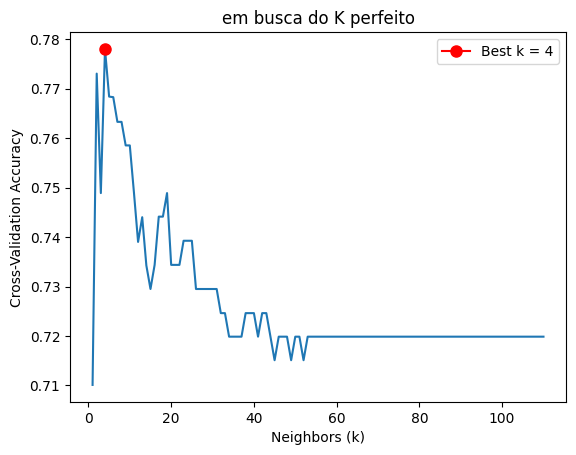

o melhor K: 4


In [158]:
#ANTES, PRECISO SABER O K PERFEITO!!!!!
k_values = list(range(1, 111))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

#CONHEÇA O ESCOLHIDO
best_k = k_values[cv_scores.index(max(cv_scores))]
#GRAFICO PRA VC <3
plt.plot(k_values, cv_scores)
plt.xlabel('Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('em busca do K perfeito')

# deixando bem visivel
plt.plot(best_k, max(cv_scores), marker='o', markersize=8, color='red', label=f'Best k = {best_k}')
plt.legend()

plt.show()

#mostrando o Honrado
print(f"o melhor K: {best_k}")

In [159]:
knn = KNeighborsClassifier(n_neighbors=4)  # You can adjust the number of neighbors (k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [160]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7
